In [140]:
#импортируем необходимые библиотеки
import pandas as pd
import numpy as np

In [141]:
# импортируем данные из файла "task", создаем 3 дата фрейма
df_task = pd.read_excel('Task.xlsx', sheet_name = 'task',skiprows = [1])
df_call = pd.read_excel('Task.xlsx', sheet_name = 'call',skiprows = [1])
df_result_pr = pd.read_excel('Task.xlsx', sheet_name = 'result_product',skiprows = [1])

In [142]:
df_task.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23119 entries, 0 to 23118
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   task_id         23119 non-null  int64         
 1   hid             23119 non-null  object        
 2   finish_dt_task  23119 non-null  datetime64[ns]
 3   base_id         23119 non-null  int64         
 4   task_result_id  23119 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 903.2+ KB


In [143]:
df_call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39598 entries, 0 to 39597
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   task_id         39598 non-null  int64         
 1   call_id         39598 non-null  object        
 2   agent_name      39598 non-null  object        
 3   call_dt         39598 non-null  datetime64[ns]
 4   call_result_id  39598 non-null  int64         
 5   Unnamed: 5      39598 non-null  object        
 6   call_time_sec   39598 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 2.1+ MB


In [144]:
df_result_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   hid              5999 non-null   object        
 1   product_type_cd  5999 non-null   object        
 2   approve_dt       3724 non-null   datetime64[ns]
 3   reject_dt        2264 non-null   datetime64[ns]
 4   using_dt         1961 non-null   datetime64[ns]
dtypes: datetime64[ns](3), object(2)
memory usage: 234.5+ KB


In [145]:
df_result_pr

,hid,product_type_cd,approve_dt,reject_dt,using_dt
0,0004c6142b4bf98fdb51ec0fead099b0,INV,2020-05-21,NaT,NaT
1,0008ddccf50e9a72ee9c6223fb45e4c4,INV,2020-05-29,NaT,NaT
2,000a2e5621a118118f42560c9821e6a1,INV,2020-04-27,NaT,2020-04-29
3,001a43fffa79a5b60c01473eeff9fd1f,INV,NaT,2020-04-01,NaT
4,001c27126f4fd13cc4126d4906c48425,INV,2020-05-06,NaT,NaT
...,...,...,...,...,...
5994,ffd2fd672444a27d03dbe426552502d5,INV,2020-05-24,NaT,2020-05-26
5995,ffd6cb7cef830393c9364ab42013f319,INV,2020-05-07,NaT,NaT
5996,ffe59b26f8c20e68ef921abdcd3532b8,INV,NaT,2020-06-05,NaT
5997,ffef7d941cae9d2aa8416f657f41109f,INV,2020-05-12,NaT,NaT


In [146]:
# в датафрейме df_task все значения task_id уникальны
df_task.task_id.value_counts()

843083337    1
911236643    1
911229236    1
911226584    1
911223840    1
            ..
887048646    1
887039136    1
887034762    1
887033327    1
933065058    1
Name: task_id, Length: 23119, dtype: int64

In [147]:
# в дата фрейме df_call показатель  task_id неуникален
df_call.task_id.value_counts()

873713374    14
869534692    13
929387253    11
874484093    10
860081782    10
             ..
896017602     1
896018446     1
896023320     1
896027504     1
933065058     1
Name: task_id, Length: 23119, dtype: int64

In [148]:
# в датафрейме df_task все значения hid уникальны
df_task.hid.value_counts()

36d2f49fc49f572677416d54536a41c6    1
658729d4a601e2378b8ac2b08d080545    1
692c721b62f348c4384335eacd46dde8    1
b8812cea323dd50672305d5699f53b0e    1
1f801a75c036c6af1f2d567fd5ca73da    1
                                   ..
7e256d08d19b6aaac1213958c7cd6fb4    1
6e7896ea8cbc19c9f41d6056f5d09f2d    1
74d4b3a2f191fba3fdab78513acf7b11    1
712b975e07b05a58b1fcfb188bf61bfa    1
1242029bded20eb92ffa31fd749d7ee4    1
Name: hid, Length: 23119, dtype: int64

In [149]:
# т.к при импорте данных для датафрейма df_call название показателя "Название результата звонка"
# не отображается, мы его переименуем
df_call = df_call.rename(columns={"Unnamed: 5": "call_result_translation"})

# Задание 1

### Самая болшая база это df_call, к которой мы будем присоединять с помощью метода merge df_task по колонне task_id, затем объеденим словари с основной таблицей
### Так же видим, что уникальных значениий task_id в датафреймах df_call и df_task равное кол-во, поэтому применим метод inner при объединении, что бы еще раз проверить.

In [150]:
# объеденяем датафрейм df_call c df_task
df1 = df_call.merge(df_task, left_on = "task_id", right_on = "task_id",how='inner')

In [151]:
#Кол-во наблюденийне не изменилось
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39598 entries, 0 to 39597
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   task_id                  39598 non-null  int64         
 1   call_id                  39598 non-null  object        
 2   agent_name               39598 non-null  object        
 3   call_dt                  39598 non-null  datetime64[ns]
 4   call_result_id           39598 non-null  int64         
 5   call_result_translation  39598 non-null  object        
 6   call_time_sec            39598 non-null  int64         
 7   hid                      39598 non-null  object        
 8   finish_dt_task           39598 non-null  datetime64[ns]
 9   base_id                  39598 non-null  int64         
 10  task_result_id           39598 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(4)
memory usage: 3.6+ MB


In [152]:
#создаем словарь для расшифровки результатов задания
dict_task_result = {6:"Успешно", 5:"Отказ", 3:"Недозвон", 1:"Дубль", 4:"Неуспешно из-за другой заявки",
                    7:"Черный список", 2:"Не было звонка"}

#создаем новую колонку с рашифровкой
df1['task_result_translation'] = df1['task_result_id'].map(dict_task_result)

In [153]:
#создаем словарь для расшифровки баз данных
dict_base = {7553:"База 1", 3145:"База 2", 3445:"База 3", 7554:"База 4"}

#создаем новую колонку с рашифровкой
df1['base_translation'] = df1['base_id'].map(dict_base)

In [154]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39598 entries, 0 to 39597
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   task_id                  39598 non-null  int64         
 1   call_id                  39598 non-null  object        
 2   agent_name               39598 non-null  object        
 3   call_dt                  39598 non-null  datetime64[ns]
 4   call_result_id           39598 non-null  int64         
 5   call_result_translation  39598 non-null  object        
 6   call_time_sec            39598 non-null  int64         
 7   hid                      39598 non-null  object        
 8   finish_dt_task           39598 non-null  datetime64[ns]
 9   base_id                  39598 non-null  int64         
 10  task_result_id           39598 non-null  int64         
 11  task_result_translation  39598 non-null  object        
 12  base_translation         39598 n

###  Словарь для call_result_id создавать не нужно т.к. перевод уже есть настоящем датафрейме

In [155]:
df1.hid.value_counts()

2a5f3463c7ab221d366efc91c4a19ac5    14
85e28f9f1f1d0d44a34ecf9517d8639a    13
a2c075f22cdb8ef55fb12e1b5393fee6    11
f7b6058776af82cb4fb025ebea963f68    10
8c7cc3be19b4b90f1e613d3c0a4577d8    10
                                    ..
a01fcff57161f071fa6189142adb7fe9     1
f868a69e3a9570076e87b30e336e9f69     1
3a8e36c18404fe1102d8fbb77576ff6c     1
c0a40c2c66d10a1f44efef4d7fb0f619     1
1242029bded20eb92ffa31fd749d7ee4     1
Name: hid, Length: 23119, dtype: int64

In [156]:
df_final_merge = df1.merge(df_result_pr, how = "left", left_on="hid", right_on="hid")

In [157]:
df_final_merge.describe()

,task_id,call_result_id,call_time_sec,base_id,task_result_id
count,3.959800e+04,39598.000000,39598.000000,39598.000000,39598.000000
mean,8.995246e+08,3.542224,109.734835,7553.054624,4.182509
std,1.859090e+07,1.802332,199.917066,0.227248,1.353218
min,8.430833e+08,1.000000,0.000000,7553.000000,1.000000
25%,8.814711e+08,2.000000,4.000000,7553.000000,3.000000
50%,9.002582e+08,3.000000,30.000000,7553.000000,5.000000
75%,9.157498e+08,5.000000,125.000000,7553.000000,5.000000
max,9.330651e+08,6.000000,4615.000000,7554.000000,7.000000


In [158]:
#выводим на экран объединенную таблицу
display(df_final_merge)

,task_id,call_id,agent_name,call_dt,call_result_id,call_result_translation,call_time_sec,hid,finish_dt_task,base_id,task_result_id,task_result_translation,base_translation,product_type_cd,approve_dt,reject_dt,using_dt
0,843083337,6645916908#16711160876,sakungurceva,2020-03-01,6,"Дозвон, Отложить",298,36d2f49fc49f572677416d54536a41c6,2020-04-15,7553,6,Успешно,База 1,INV,NaT,2020-04-22,NaT
1,843083337,6750206063#16711160876,sakungurceva,2020-03-17,6,"Дозвон, Отложить",9,36d2f49fc49f572677416d54536a41c6,2020-04-15,7553,6,Успешно,База 1,INV,NaT,2020-04-22,NaT
2,843083337,6769109629#16711160876,sakungurceva,2020-03-24,6,"Дозвон, Отложить",111,36d2f49fc49f572677416d54536a41c6,2020-04-15,7553,6,Успешно,База 1,INV,NaT,2020-04-22,NaT
3,843083337,6890964670#16711160876,sakungurceva,2020-04-15,5,Недозвон,7,36d2f49fc49f572677416d54536a41c6,2020-04-15,7553,6,Успешно,База 1,INV,NaT,2020-04-22,NaT
4,843083337,6926247810#16711160876,lapleshivenkova,2020-04-15,3,"Дозвон, Успешно",1329,36d2f49fc49f572677416d54536a41c6,2020-04-15,7553,6,Успешно,База 1,INV,NaT,2020-04-22,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39593,933035272,7124347282#18483260522,aztrofimova,2020-05-30,5,Недозвон,0,9a2d6dd8ff0a11bdc7a65c8ded5d6d92,2020-05-30,7553,1,Дубль,База 1,NaN,NaT,NaT,NaT
39594,933040837,7123998330#18480990905,aztrofimova,2020-05-30,5,Недозвон,9,3c682df2f35ed1dc634501b4b7ae25fe,2020-05-30,7554,5,Отказ,База 4,NaN,NaT,NaT,NaT
39595,933040837,7124519269#18480990905,zadenis,2020-05-30,1,"Дозвон, Отказ",41,3c682df2f35ed1dc634501b4b7ae25fe,2020-05-30,7554,5,Отказ,База 4,NaN,NaT,NaT,NaT
39596,933042718,7124237815#18482537123,npmoskalenko,2020-05-30,1,"Дозвон, Отказ",138,d6262e2d5840a2e68fcf028c9732606c,2020-05-30,7553,5,Отказ,База 1,NaN,NaT,NaT,NaT


In [159]:
#Сделаем импорт графических библиотек
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
# импортируем seaborn для лучшего отображения
import seaborn as sns
sns.set()

C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Разброс количества секунд по квртилям')

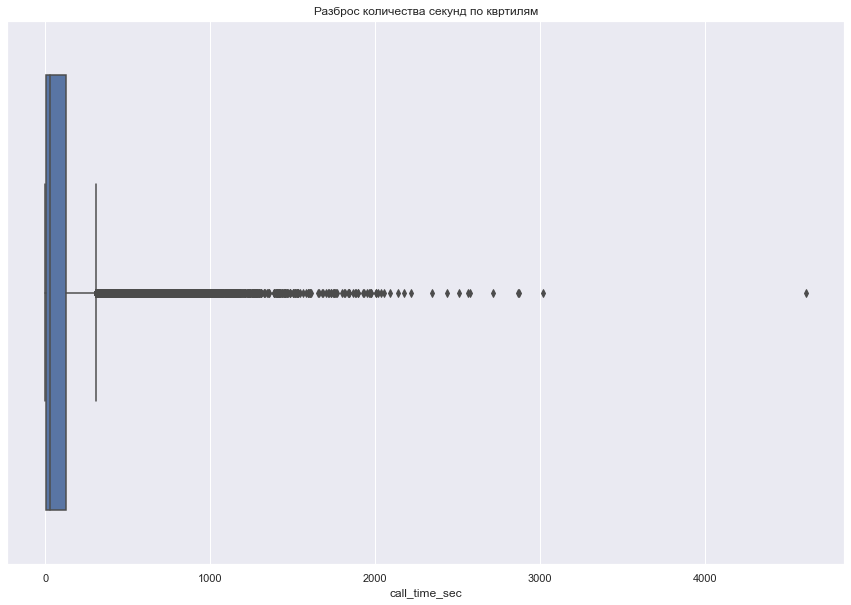

In [160]:
# посмотрим как распределны показатели длины звонка
plt.figure(figsize=(15,10))
ax=sns.boxplot(df_final_merge.call_time_sec)
ax.set_title("Разброс количества секунд по квртилям")

### В целом звонок не должен длияться долго, но можем предположить, что некоторые звонки дляться до часа. примем максимальное значение как выброс.

In [161]:
df_final_merge = df_final_merge[df_final_merge.call_time_sec < 4000]

# Задание 2

## Задание 2.1 
## Создание общей вороднки продаж по базам данных

In [162]:
#определяем кол-во баз данных
df_final_merge.base_translation.value_counts()

База 1    37434
База 4     2163
Name: base_translation, dtype: int64

In [163]:
# Разбиваем общую базу данных на 2 базы: База 1 и База 4

df_base_1 = df_final_merge[df_final_merge["base_translation"] == "База 1"]

df_base_4 = df_final_merge[df_final_merge["base_translation"] == "База 4"]

### Расчитываем показатели для воронки продаж для Базы 1

In [164]:
 # для тех кто дозовнился  
df_b1_1 = df_base_1[df_base_1.call_result_translation.str.contains("Дозвон")].reset_index(drop=True)    
cnt_b1_1 = df_b1_1.task_id.nunique()
print(f'Кол-во клеинтов к которым дозвонились: {cnt_b1_1}')

#кто дозвонился и не получил отказ
df_b1_2 = df_b1_1[~df_b1_1.call_result_translation.str.contains("Отказ")].reset_index(drop=True) 
cnt_b1_2 = df_b1_2.task_id.nunique()
print(f'Кол-во клеинтов к которым дозвонились и не отказали: {cnt_b1_2}')

#кто дозвонился и продал продукт
df_b1_3 = df_b1_2[df_b1_2.call_result_translation.str.contains("Успешно")].reset_index(drop=True)
cnt_b1_3 = df_b1_3.task_id.nunique()
print(f'Кол-во клеинтов к которым дозвонились и продали: {cnt_b1_3}')

Кол-во клеинтов к которым дозвонились: 17896
Кол-во клеинтов к которым дозвонились и не отказали: 11313
Кол-во клеинтов к которым дозвонились и продали: 5559


In [165]:
# проверяем есть ли клиенты, которые повторно делали покупку
df_b1_3.task_id.value_counts(ascending =True)

843083337    1
912437232    1
912429222    1
912426384    1
912408973    1
            ..
889865611    1
889862266    1
889849478    1
889942164    1
933065058    1
Name: task_id, Length: 5559, dtype: int64

### Расчитываем показатели для воронки продаж для Базы 1

In [166]:
 # для тех кто дозовнился  
df_b4_1 = df_base_4[df_base_4.call_result_translation.str.contains("Дозвон")].reset_index(drop=True)    
cnt_b4_1 = df_b4_1.task_id.nunique()
print(f'Кол-во клеинтов к которым дозвонились: {cnt_b4_1}')

#кто дозвонился и не получил отказ
df_b4_2 = df_b4_1[~df_b4_1.call_result_translation.str.contains("Отказ")].reset_index(drop=True) 
cnt_b4_2 = df_b4_2.task_id.nunique()
print(f'Кол-во клеинтов к которым дозвонились и не отказали: {cnt_b4_2}')

#кто дозвонился и продал продукт
df_b4_3 = df_b4_2[df_b4_2.call_result_translation.str.contains("Успешно")].reset_index(drop=True)
cnt_b4_3 = df_b4_3.task_id.nunique()
print(f'Кол-во клеинтов к которым дозвонились и продали: {cnt_b4_3}')

Кол-во клеинтов к которым дозвонились: 910
Кол-во клеинтов к которым дозвонились и не отказали: 678
Кол-во клеинтов к которым дозвонились и продали: 451


In [167]:
# проверяем есть ли клиенты, которые повторно делали покупку
df_b4_3.task_id.value_counts(ascending =True)

869211882    1
884648160    1
884588246    1
884524170    1
884513084    1
            ..
878224927    1
878206584    1
878204100    1
877675231    1
931822370    1
Name: task_id, Length: 451, dtype: int64

### Создаем исходные данные для построение воронки продаж

In [168]:
qnt_list = [cnt_b1_1,cnt_b1_2,cnt_b1_3,cnt_b4_1,cnt_b4_2,cnt_b4_3]
calls_list = ["Звонки","Звонок + заинтересованность", "Звоно + продажа"]
base_list = ["База 1","База 4"]

In [169]:
import matplotlib.pyplot as plt
import plotly.express as px

In [170]:
data = dict(Quantity=qnt_list,
    
            Stage=["Звонки","Звонок + заинтересованность", "Звонок + продажа"]*2,
    
            База=["База 1"]*3 + ["База 4"]*3)
    
fig = px.funnel(data, y='Stage', x='Quantity', color='База',
                color_discrete_map={"База 1": "#c4c425", 
                                    "База 4": "#617588"},
                template="simple_white",
                title='Воронка продаж',
                labels={"Stage": "Этапы"},
                opacity = 0.8)
    
fig.show()

## Задание 2.2

In [171]:
# находим сколько каждый сотрудник совершил звонков 
df_calls_agname = df_final_merge.groupby('agent_name')['call_id'].count()
df_calls_agname

agent_name
aashapovalov64931     549
afgluxov              263
amshevchenko           18
arxackevich           529
asmirov               369
                     ... 
yuapodorueva            5
yugdulova             210
yuktixonova           240
yuvbabina             139
zadenis              1997
Name: call_id, Length: 106, dtype: int64

<AxesSubplot:title={'center':'Топ 15 сотрудников по звонкам'}, xlabel='agent_name'>

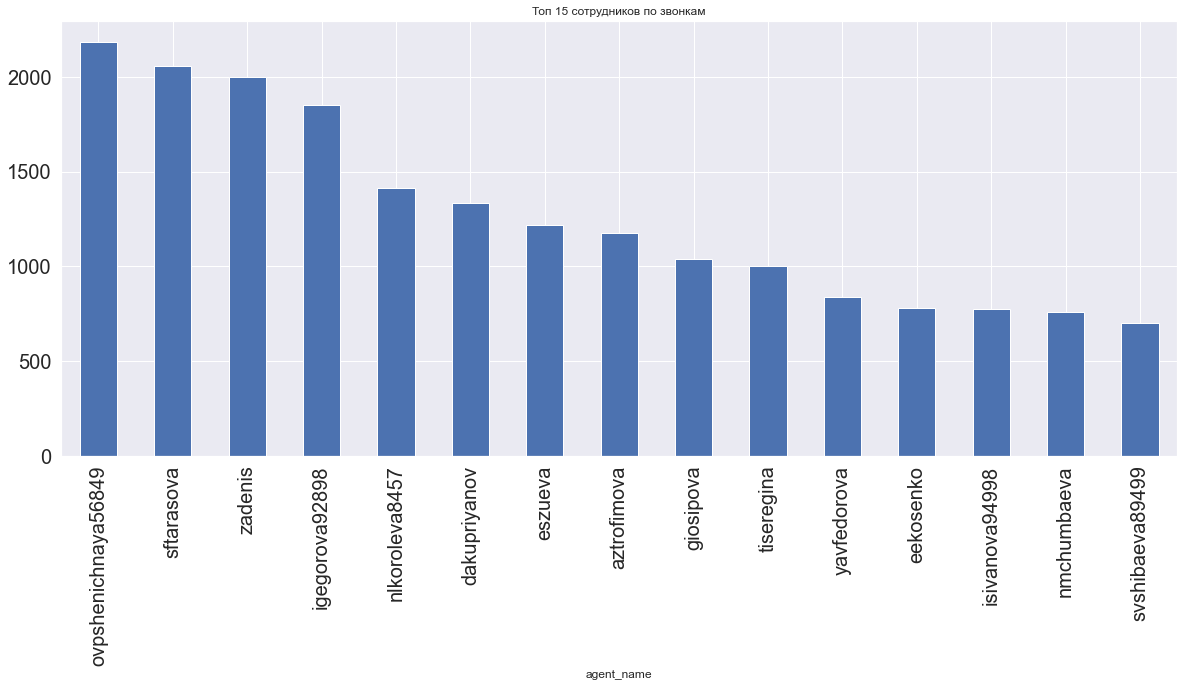

In [172]:
# Гистограмма количества звонков
df_calls_agname.sort_values(ascending = False).head(15).plot(kind='bar',figsize=(20,8),fontsize=20,
                                                             title='Топ 15 сотрудников по звонкам')

In [173]:
# находим среднюю продолжительность разговоря для каждого сотрудника
df_meantime_agname = df_final_merge.groupby('agent_name')['call_time_sec'].mean()
df_meantime_agname

agent_name
aashapovalov64931    100.147541
afgluxov             137.117871
amshevchenko         206.555556
arxackevich          140.096408
asmirov              138.783198
                        ...    
yuapodorueva          40.000000
yugdulova            142.895238
yuktixonova           74.633333
yuvbabina            130.366906
zadenis               90.095643
Name: call_time_sec, Length: 106, dtype: float64

<AxesSubplot:title={'center':'Топ 15 сотрудников по среднему продолжительностью звонка'}, xlabel='agent_name'>

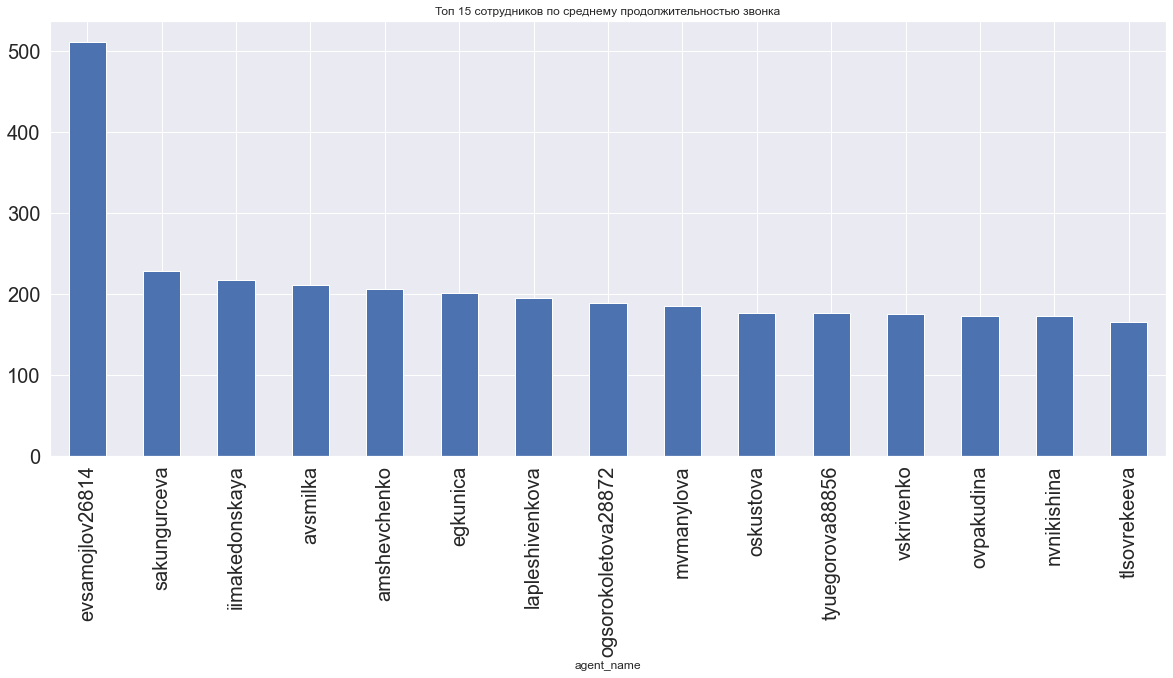

In [174]:
# отображаем гистограмму топ 15 сотрдников по кол-ву 
df_meantime_agname.sort_values(ascending = False).head(15).plot(kind='bar',figsize=(20,8),fontsize=20,
                                                               title='Топ 15 сотрудников по среднему продолжительностью звонка')

In [175]:
data_1 = df_final_merge[df_final_merge['call_result_translation'] == 'Дозвон, Успешно'].groupby(
    'agent_name')["call_result_translation"].count()

In [176]:
data_2 = df_final_merge[(df_final_merge['call_result_translation'] == 'Дозвон, Успешно') |
               (df_final_merge['call_result_translation'] == 'Дозвон, Отказ')].groupby(
                'agent_name')["call_result_translation"].count()

<AxesSubplot:title={'center':'Топ 15 сотрудников по конверсии'}, xlabel='agent_name'>

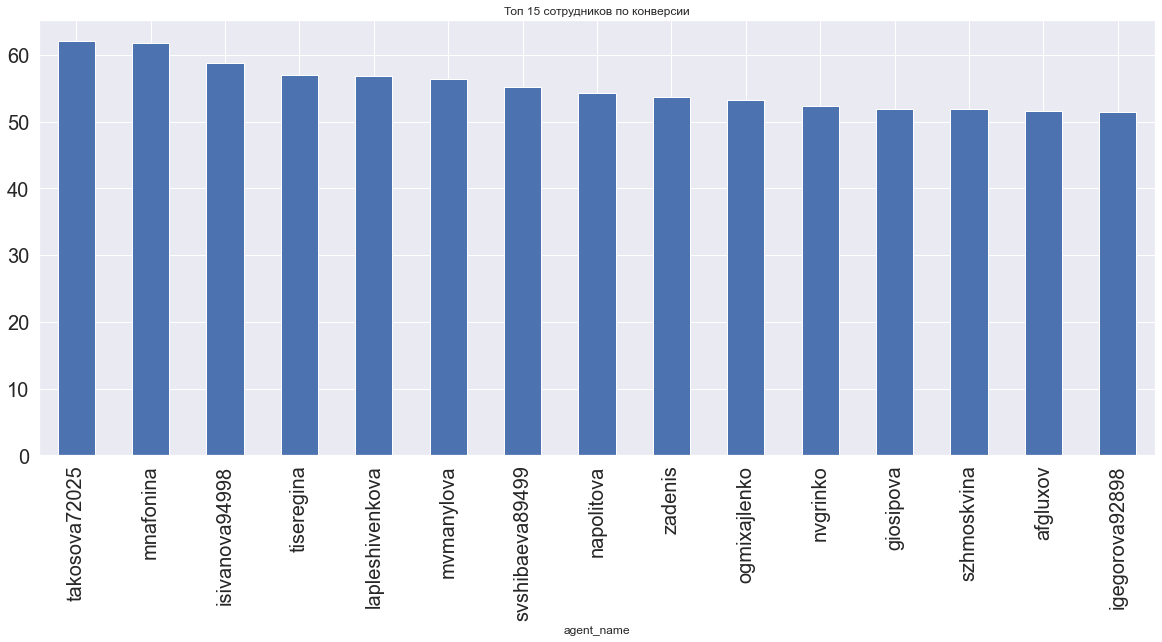

In [177]:
(data_1/data_2*100).sort_values(ascending = False).head(15).plot(kind='bar',figsize=(20,8),fontsize=20,
                                                                title='Топ 15 сотрудников по конверсии')

In [178]:
# создаем датафрейм с конверсией звонков
a = (data_1/data_2*100).sort_values(ascending = False).reset_index()

In [179]:
# создаем датафрейм количества звонков и средней  продолжительностью
m = pd.concat([df_calls_agname,df_meantime_agname],axis=1).reset_index()

In [180]:
# объеденяем метотдом right т.к. наиболее важный параметр это конверсия
df_analyze = m.merge(a,how="right").set_index('agent_name')

In [181]:
df_analyze.columns=['num_calls','mean_call_duration','call_conversion']

### Можно предположить, что длина звонка может повлиять на конверсию

<AxesSubplot:xlabel='call_conversion'>

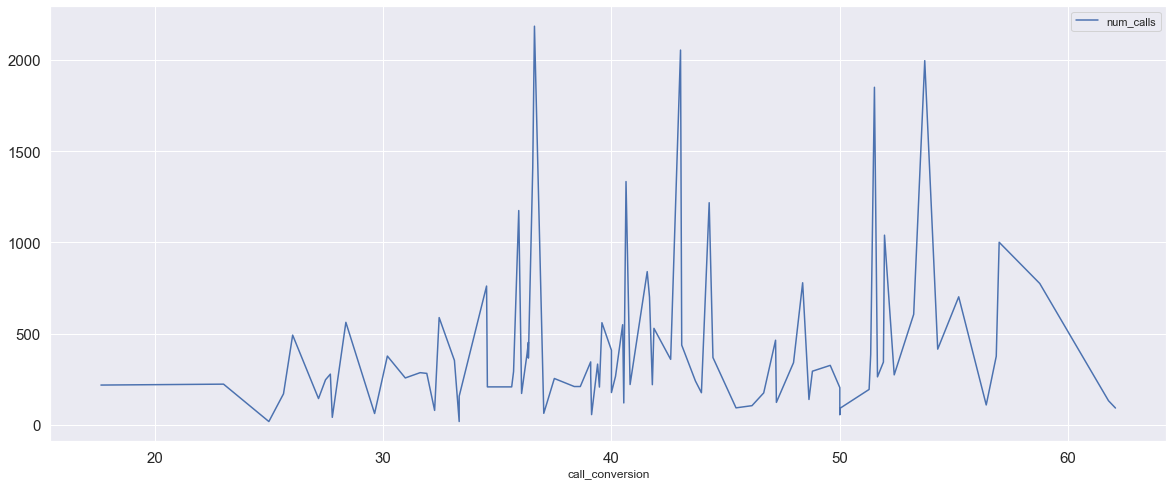

In [182]:
df_analyze.iloc[::,[0,2]].set_index('call_conversion').plot(figsize=(20,8),fontsize=15)

### График видет себя хаотично с увеличением конверсии поэто прямой зависимости мы не замечаем

In [183]:
# Построим интерективные графики распределния
fig = px.scatter(df_analyze, x="call_conversion", y="num_calls", marginal_y="box",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()

### Количество звонков предсказуемо не сильно влияют на конверсию

In [184]:
fig = px.scatter(df_analyze, x="call_conversion", y="mean_call_duration", marginal_y="box",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()

### Среднее продолжительность не сильно влияет на конверсию.
### Из проделанного анализа можно сделать вывод что около трети всех звонков переходят в продажу, что видно из воронки продаж, в базе 4 почти половина.

### Предложение: можно посмотреть сезонность(производительность по месяцам и как она влияет на конверсию)

In [185]:
print(f'Средняя конверсия по всем сотрудникам: {df_analyze.call_conversion.mean():.1f}')

Средняя конверсия по всем сотрудникам: 41.2


In [186]:
df_final_merge

,task_id,call_id,agent_name,call_dt,call_result_id,call_result_translation,call_time_sec,hid,finish_dt_task,base_id,task_result_id,task_result_translation,base_translation,product_type_cd,approve_dt,reject_dt,using_dt
0,843083337,6645916908#16711160876,sakungurceva,2020-03-01,6,"Дозвон, Отложить",298,36d2f49fc49f572677416d54536a41c6,2020-04-15,7553,6,Успешно,База 1,INV,NaT,2020-04-22,NaT
1,843083337,6750206063#16711160876,sakungurceva,2020-03-17,6,"Дозвон, Отложить",9,36d2f49fc49f572677416d54536a41c6,2020-04-15,7553,6,Успешно,База 1,INV,NaT,2020-04-22,NaT
2,843083337,6769109629#16711160876,sakungurceva,2020-03-24,6,"Дозвон, Отложить",111,36d2f49fc49f572677416d54536a41c6,2020-04-15,7553,6,Успешно,База 1,INV,NaT,2020-04-22,NaT
3,843083337,6890964670#16711160876,sakungurceva,2020-04-15,5,Недозвон,7,36d2f49fc49f572677416d54536a41c6,2020-04-15,7553,6,Успешно,База 1,INV,NaT,2020-04-22,NaT
4,843083337,6926247810#16711160876,lapleshivenkova,2020-04-15,3,"Дозвон, Успешно",1329,36d2f49fc49f572677416d54536a41c6,2020-04-15,7553,6,Успешно,База 1,INV,NaT,2020-04-22,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39593,933035272,7124347282#18483260522,aztrofimova,2020-05-30,5,Недозвон,0,9a2d6dd8ff0a11bdc7a65c8ded5d6d92,2020-05-30,7553,1,Дубль,База 1,NaN,NaT,NaT,NaT
39594,933040837,7123998330#18480990905,aztrofimova,2020-05-30,5,Недозвон,9,3c682df2f35ed1dc634501b4b7ae25fe,2020-05-30,7554,5,Отказ,База 4,NaN,NaT,NaT,NaT
39595,933040837,7124519269#18480990905,zadenis,2020-05-30,1,"Дозвон, Отказ",41,3c682df2f35ed1dc634501b4b7ae25fe,2020-05-30,7554,5,Отказ,База 4,NaN,NaT,NaT,NaT
39596,933042718,7124237815#18482537123,npmoskalenko,2020-05-30,1,"Дозвон, Отказ",138,d6262e2d5840a2e68fcf028c9732606c,2020-05-30,7553,5,Отказ,База 1,NaN,NaT,NaT,NaT


In [187]:
df_final_merge.groupby(['call_dt','agent_name'])['call_time_sec'].count()

call_dt     agent_name         
2020-03-01  sakungurceva            1
2020-03-03  nvgrinko                1
            ogmixajlenko            1
            sakungurceva            1
2020-03-04  evsamojlov26814         1
                                   ..
2020-05-30  ogmixajlenko            8
            ovpshenichnaya56849    38
            sftarasova             58
            tiseregina              8
            zadenis                48
Name: call_time_sec, Length: 1826, dtype: int64

# Задание 3

In [188]:
# устанавливаем необходимые библиотеки
!pip install -U pandasql

In [189]:
# импортируем библиотеку
from pandasql import sqldf

In [190]:
# создаем 2 датафрейма со словарями для дальнейшего объединения таблиц
df_base = pd.DataFrame.from_dict(dict_base, orient = 'index').reset_index() # создаем датафрейм
df_base.columns = ['base_id','base_translation'] # переименовываем колонки

df_task_result = pd.DataFrame.from_dict(dict_task_result, orient = 'index').reset_index()
df_task_result.columns=['task_result_id', 'task_result_translation']

In [191]:
# Пишем SQL запрос ко всем дата фреймам которые создавались ранее
query = 'SELECT task_id, call_id, agent_name, call_dt, call_result_id,\
       call_result_translation, call_time_sec, df3.hid, finish_dt_task,\
       base_id, task_result_id, task_result_translation,\
       base_translation, product_type_cd, approve_dt, reject_dt, using_dt\
        \
        FROM\
            (\
                SELECT * FROM\
                (\
                     SELECT * FROM\
                     \
                            (SELECT * FROM df_call c\
                        \
                            LEFT JOIN \
                                df_task t on t.task_id = c.task_id WHERE c.call_time_sec < 4000) df1\
                                    \
                    LEFT JOIN\
                        df_task_result dts on dts.task_result_id = df1.task_result_id) df2 \
                            \
                LEFT JOIN\
                    df_base db on db.base_id = df2.base_id ) df3 \
        LEFT JOIN\
            df_result_pr drp on df3.hid = drp.hid'
            
            
sqldf(query)

,task_id,call_id,agent_name,call_dt,call_result_id,call_result_translation,call_time_sec,hid,finish_dt_task,base_id,task_result_id,task_result_translation,base_translation,product_type_cd,approve_dt,reject_dt,using_dt
0,843083337,6645916908#16711160876,sakungurceva,2020-03-01 00:00:00.000000,6,"Дозвон, Отложить",298,36d2f49fc49f572677416d54536a41c6,2020-04-15 00:00:00.000000,7553,6,Успешно,База 1,INV,None,2020-04-22 00:00:00.000000,None
1,843083337,6750206063#16711160876,sakungurceva,2020-03-17 00:00:00.000000,6,"Дозвон, Отложить",9,36d2f49fc49f572677416d54536a41c6,2020-04-15 00:00:00.000000,7553,6,Успешно,База 1,INV,None,2020-04-22 00:00:00.000000,None
2,843083337,6769109629#16711160876,sakungurceva,2020-03-24 00:00:00.000000,6,"Дозвон, Отложить",111,36d2f49fc49f572677416d54536a41c6,2020-04-15 00:00:00.000000,7553,6,Успешно,База 1,INV,None,2020-04-22 00:00:00.000000,None
3,843083337,6890964670#16711160876,sakungurceva,2020-04-15 00:00:00.000000,5,Недозвон,7,36d2f49fc49f572677416d54536a41c6,2020-04-15 00:00:00.000000,7553,6,Успешно,База 1,INV,None,2020-04-22 00:00:00.000000,None
4,843083337,6926247810#16711160876,lapleshivenkova,2020-04-15 00:00:00.000000,3,"Дозвон, Успешно",1329,36d2f49fc49f572677416d54536a41c6,2020-04-15 00:00:00.000000,7553,6,Успешно,База 1,INV,None,2020-04-22 00:00:00.000000,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39592,933035272,7124347282#18483260522,aztrofimova,2020-05-30 00:00:00.000000,5,Недозвон,0,9a2d6dd8ff0a11bdc7a65c8ded5d6d92,2020-05-30 00:00:00.000000,7553,1,Дубль,База 1,None,None,None,None
39593,933040837,7123998330#18480990905,aztrofimova,2020-05-30 00:00:00.000000,5,Недозвон,9,3c682df2f35ed1dc634501b4b7ae25fe,2020-05-30 00:00:00.000000,7554,5,Отказ,База 4,None,None,None,None
39594,933040837,7124519269#18480990905,zadenis,2020-05-30 00:00:00.000000,1,"Дозвон, Отказ",41,3c682df2f35ed1dc634501b4b7ae25fe,2020-05-30 00:00:00.000000,7554,5,Отказ,База 4,None,None,None,None
39595,933042718,7124237815#18482537123,npmoskalenko,2020-05-30 00:00:00.000000,1,"Дозвон, Отказ",138,d6262e2d5840a2e68fcf028c9732606c,2020-05-30 00:00:00.000000,7553,5,Отказ,База 1,None,None,None,None


In [192]:
df_final_merge

,task_id,call_id,agent_name,call_dt,call_result_id,call_result_translation,call_time_sec,hid,finish_dt_task,base_id,task_result_id,task_result_translation,base_translation,product_type_cd,approve_dt,reject_dt,using_dt
0,843083337,6645916908#16711160876,sakungurceva,2020-03-01,6,"Дозвон, Отложить",298,36d2f49fc49f572677416d54536a41c6,2020-04-15,7553,6,Успешно,База 1,INV,NaT,2020-04-22,NaT
1,843083337,6750206063#16711160876,sakungurceva,2020-03-17,6,"Дозвон, Отложить",9,36d2f49fc49f572677416d54536a41c6,2020-04-15,7553,6,Успешно,База 1,INV,NaT,2020-04-22,NaT
2,843083337,6769109629#16711160876,sakungurceva,2020-03-24,6,"Дозвон, Отложить",111,36d2f49fc49f572677416d54536a41c6,2020-04-15,7553,6,Успешно,База 1,INV,NaT,2020-04-22,NaT
3,843083337,6890964670#16711160876,sakungurceva,2020-04-15,5,Недозвон,7,36d2f49fc49f572677416d54536a41c6,2020-04-15,7553,6,Успешно,База 1,INV,NaT,2020-04-22,NaT
4,843083337,6926247810#16711160876,lapleshivenkova,2020-04-15,3,"Дозвон, Успешно",1329,36d2f49fc49f572677416d54536a41c6,2020-04-15,7553,6,Успешно,База 1,INV,NaT,2020-04-22,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39593,933035272,7124347282#18483260522,aztrofimova,2020-05-30,5,Недозвон,0,9a2d6dd8ff0a11bdc7a65c8ded5d6d92,2020-05-30,7553,1,Дубль,База 1,NaN,NaT,NaT,NaT
39594,933040837,7123998330#18480990905,aztrofimova,2020-05-30,5,Недозвон,9,3c682df2f35ed1dc634501b4b7ae25fe,2020-05-30,7554,5,Отказ,База 4,NaN,NaT,NaT,NaT
39595,933040837,7124519269#18480990905,zadenis,2020-05-30,1,"Дозвон, Отказ",41,3c682df2f35ed1dc634501b4b7ae25fe,2020-05-30,7554,5,Отказ,База 4,NaN,NaT,NaT,NaT
39596,933042718,7124237815#18482537123,npmoskalenko,2020-05-30,1,"Дозвон, Отказ",138,d6262e2d5840a2e68fcf028c9732606c,2020-05-30,7553,5,Отказ,База 1,NaN,NaT,NaT,NaT


###  Можно было также создать реляционную базу данных состоящую из нескольких таблиц, подсоедениться к базе дынных, написать такой же запрос.

# Задание 4

## Задание 4.1

In [193]:
# Устанавливаем необходимые библиотеки 
!pip install pyworkforce

In [194]:
# Находить оптимальное кол-во операторов мы будем с помощью формулы Эрланга
from pyworkforce.queuing import MultiErlangC

In [195]:
#Преобразуем данные из excel в дата фрейм
data = pd.read_excel("Task.xlsx", sheet_name = "Задание 4 ",skiprows = [i for i in range(0,12)])

In [196]:
# выделяем датафрейм с входящими звонками по дням и переименовываем колонки
data_mnth = data.iloc[::,[0,1]]
data_mnth.columns = ['day', 'call_cnt']
# выделяем датафрейм с загрузкой по дням и переименовываем колонки
data_day_load = data.iloc[0:24,[4,5]]
data_day_load.columns = ['period','load' ] 

In [197]:
#определяем переменные
service_level = 0.8
interval = 60
asa = 20/60
max_occupancy = 0.8
aht = 4.8
AR = 0.03 # (abandoned rate) процент звонков которые не будут обработаны

In [198]:
data_mnth['call_final_cnt'] = data_mnth['call_cnt']*(1-AR)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [199]:
data_mnth

,day,call_cnt,call_final_cnt
0,день 1,7114,6900.58
1,день 2,7954,7715.38
2,день 3,6893,6686.21
3,день 4,9474,9189.78
4,день 5,10244,9936.68
5,день 6,12223,11856.31
6,день 7,7348,7127.56
7,день 8,5015,4864.55
8,день 9,5997,5817.09
9,день 10,8170,7924.90


In [200]:
# делаем матрицу звонков в соответствии с загрузкой
count = 0
for call_final_cnt in list(data_mnth.call_final_cnt):
    l = [load*call_final_cnt for load in data_day_load.load]
    count += 1
    data_day_load['transaction'+ str(count)] = pd.Series(l)

In [201]:
data_day_load

,period,load,transaction1,transaction2,transaction3,transaction4,transaction5,transaction6,transaction7,transaction8,...,transaction22,transaction23,transaction24,transaction25,transaction26,transaction27,transaction28,transaction29,transaction30,transaction31
0,0-1,0.001652,11.397476,12.743256,11.043407,15.178477,16.412109,19.582702,11.772372,8.034628,...,10.791875,13.634034,14.274882,14.073015,13.485037,12.881038,13.065282,10.436204,10.626856,11.020978
1,1-2,0.000790,5.453476,6.097406,5.284061,7.262613,7.852882,9.369951,5.632856,3.844417,...,5.163707,6.523626,6.830260,6.733670,6.452334,6.163332,6.251489,4.993526,5.084749,5.273329
2,2-3,0.000456,3.145126,3.516493,3.047421,4.188491,4.528911,5.403834,3.248578,2.217150,...,2.978011,3.762303,3.939145,3.883439,3.721187,3.554514,3.605356,2.879864,2.932474,3.041232
3,3-4,0.000577,3.981903,4.452074,3.858203,5.302860,5.733851,6.841552,4.112879,2.807034,...,3.770326,4.763283,4.987174,4.916648,4.711228,4.500211,4.564579,3.646066,3.712674,3.850367
4,4-5,0.001330,9.175689,10.259127,8.890642,12.219635,13.212786,15.765315,9.477504,6.468384,...,8.688142,10.976260,11.492183,11.329667,10.856308,10.370051,10.518379,8.401805,8.555292,8.872585
5,5-6,0.003747,25.853514,28.906221,25.050362,34.430165,37.228479,44.420510,26.703911,18.225383,...,24.479797,30.926821,32.380491,31.922585,30.588843,29.218760,29.636690,23.673010,24.105477,24.999484
6,6-7,0.008288,57.189359,63.942109,55.412743,76.161370,82.351391,98.260547,59.070482,40.315524,...,54.150622,68.411786,71.627381,70.614468,67.664160,64.633462,65.557945,52.365966,53.322606,55.300197
7,7-8,0.023537,162.421242,181.599460,157.375544,216.302902,233.882935,279.065904,167.763745,114.498528,...,153.791044,194.293614,203.426098,200.549366,192.170311,183.562944,186.188533,148.722515,151.439429,157.055907
8,8-9,0.049425,341.058639,381.329830,330.463480,454.201510,491.116769,585.993779,352.277042,240.428602,...,322.936603,407.985524,427.162282,421.121603,403.526928,385.452833,390.966151,312.293502,317.998588,329.792294
9,9-10,0.070106,483.772347,540.894749,468.743715,644.259097,696.621299,831.198959,499.685016,341.034343,...,458.067266,578.704339,605.905484,597.337123,572.380074,546.742995,554.563324,442.970631,451.062971,467.791675


In [202]:
required_positions_scenarios = {"service_level": [service_level], "max_occupancy": [max_occupancy]}
operators_list= []
for transaction in data_day_load.iloc[::,2:]:
        param_grid = { "transactions": list(data_day_load[str(transaction)]), "aht": [aht],"interval": [interval], "asa": [asa]}
        multi_erlang = MultiErlangC(param_grid=param_grid, n_jobs=-1)
    
        positions_requirements = multi_erlang.required_positions(required_positions_scenarios)
        operators_list += list(pd.DataFrame(positions_requirements)['raw_positions'])

In [203]:
# Делаем reshape list, чтобы перевести в датафрейм
df_oprtrs = pd.DataFrame(np.reshape(operators_list,(-1,24)))
# создаем датафрейм с кол-вом операторов, на каждый час работы
df_oprtrs = df_oprtrs.T # транспонируем
df_oprtrs.columns = list(range(1,32)) # присваиваем название колонок,чтобы соответствовали названию дней

In [206]:
# устанавливаем необходимые опициии и библиотеки для визуализации в интерактивном виде
!pip install plotly
pd.options.plotting.backend = "plotly"

In [216]:
# Отображаем дата фрейм с рачетом  кол-ва операторов по дням и по часам в рамках каждого дня
display(df_oprtrs.style.background_gradient(cmap ='viridis'))

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,3,3,3,3,3,4,3,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
4,2,3,2,3,3,3,2,2,2,3,2,2,2,2,3,2,3,2,3,3,2,2,3,3,3,3,3,3,2,2,2
5,4,5,4,5,6,6,4,3,4,5,4,4,4,4,5,4,5,4,5,5,4,4,5,5,5,5,5,5,4,4,4
6,7,8,7,9,10,11,8,6,7,8,7,7,7,7,8,8,8,8,9,8,7,7,9,9,9,8,8,8,7,7,7
7,17,19,17,22,24,28,18,13,15,19,17,17,17,17,19,17,19,17,21,18,16,16,20,21,21,20,19,19,16,16,17
8,35,39,34,46,50,59,36,25,29,40,34,34,34,33,40,35,38,35,43,37,31,33,41,43,43,41,39,40,32,32,33
9,49,55,47,65,70,84,50,35,41,56,48,48,48,47,57,50,54,49,61,53,44,46,58,61,60,58,55,56,45,46,47


In [208]:
# Визуализируем датафрейм (визуализация интерактивная)
df_oprtrs.plot(title = "Изменение кол-ва операторов по дням и часам",labels={"variable": "День", "value": "Кол-во операторов"
                                                                            , "index": "Часы в сутках"} )

### Таким образом мы находим минимальное количество операторов по дняи и по интервалам, таким образом, чтобы все вводные параметры соблюдались

## Задание 4.2

In [213]:
# т.к. все разбита на часовые промежутки нам необхдимо только просумировать кол-во необходимых операторов
dataframe = pd.DataFrame(df_oprtrs.sum()).reset_index().rename(columns = {'index':'День', 0: 'Чел-ко часы'})
dataframe.style.background_gradient(cmap ='viridis')

,День,Чел-ко часы
0,1,712
1,2,797
2,3,693
3,4,939
4,5,1016
5,6,1204
6,7,736
7,8,513
8,9,603
9,10,816


In [215]:
# Делакм интерактивную визуализацию
fig = df_oprtrs.sum().plot(kind="bar",labels={"variable": "День", "value": "Человеко часы"
                                        , "index": "День"},title = "Изменение человеко часов по дням месяца")
fig.update_layout(showlegend=False)
fig.show()